In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_treated_new.pkl'))

df = df.dropna()
print(len(df))
df.head()

/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


72093


,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,id_escola,serie,turno,desempenho_aluno_cat,leitura,frequenta_entretenimento,responsaveis_incentivam,escolaridade_pais,leitura_pais,estuda_regularmente
27111,2015,PB,1,17523018,0,MT,-0.627672,0.648351,214.882332,36.237847,...,25083490,9,3,0,0.857143,0.75,1.0,2.5,1.0,1.000000
27112,2015,PB,1,17491737,0,LP,-1.027257,0.354996,193.389947,19.557923,...,61134907,9,1,0,1.142857,1.75,1.0,2.0,1.0,2.000000
27115,2015,PB,1,17491737,0,MT,-0.807123,0.639382,204.852398,35.736548,...,61134907,9,1,0,1.142857,1.75,1.0,2.0,1.0,2.000000
27117,2015,PB,1,17523323,0,LP,-1.799137,0.475179,150.864483,26.179209,...,25084526,9,1,0,0.833333,0.50,1.0,0.5,1.0,1.333333
27118,2015,PB,1,17523323,0,MT,-1.013599,0.505411,193.311973,28.248597,...,25084526,9,1,0,0.833333,0.50,1.0,0.5,1.0,1.333333


In [3]:
#df = df[df['disciplina'] == 'LP']
#print(len(df))

In [4]:
mediana = df['proficiencia'].median()

df['target'] = df['proficiencia'].apply(lambda x: 1 if x >= mediana else 0)

In [5]:
df['target'].value_counts()

target
1    36047
0    36046
Name: count, dtype: int64

In [8]:
df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,72093.000000,72093.000000
mean,-0.153817,0.906787
std,0.825154,0.729180
min,-2.515145,0.000000
25%,-0.750190,0.000000
50%,-0.171179,1.000000
75%,0.420344,1.000000
max,3.214629,3.000000


In [9]:
print(df.columns)

Index(['ano', 'sigla_uf', 'escola_publica', 'id_aluno', 'situacao_censo',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento', 'idade', 'possui_computador', 'tempo_lazer',
       'gosta_estudar_disciplina', 'rede', 'id_escola', 'serie', 'turno',
       'desempenho_aluno_cat', 'leitura', 'frequenta_entretenimento',
       'responsaveis_incentivam', 'escolaridade_pais', 'leitura_pais',
       'estuda_regularmente', 'target'],
      dtype='object')


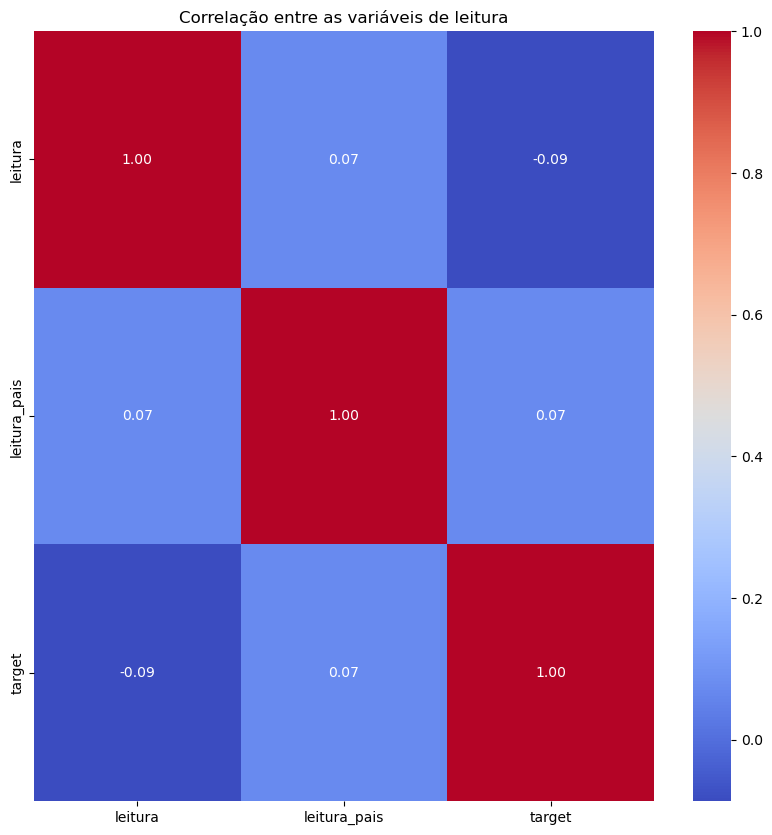

In [10]:
# selecionando colunas de leitura
columns_oi = [col for col in df.columns if 'leitura' in col] + ['target']

# correlação entre as colunas
correlation = df[columns_oi].corr()

# plotando o heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre as variáveis de leitura')
plt.show()

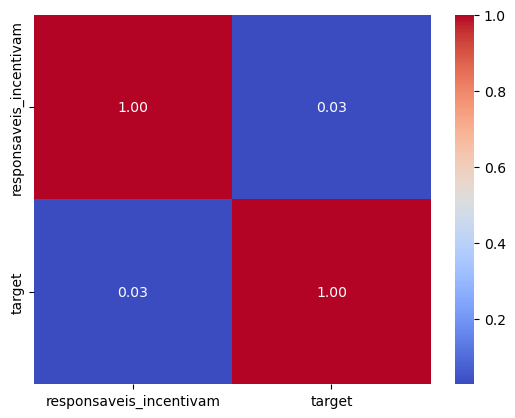

<Figure size 1000x1000 with 0 Axes>

In [11]:
# colunas responsaveis_

columns_oi = [col for col in df.columns if 'responsaveis_' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

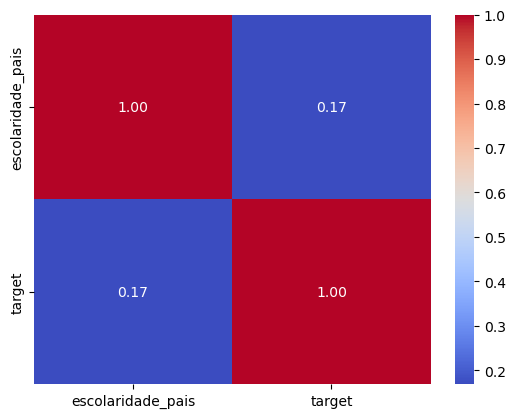

<Figure size 1000x1000 with 0 Axes>

In [12]:
# colunas de escolaridade_mae e escolaridade_mae

columns_oi = [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

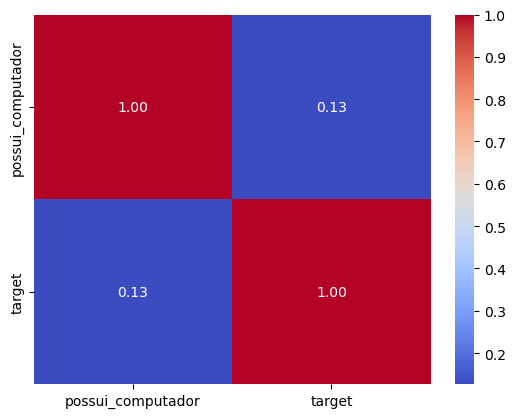

<Figure size 1000x1000 with 0 Axes>

In [13]:
# coluna possui_computador

columns_oi = [col for col in df.columns if 'possui_computador' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

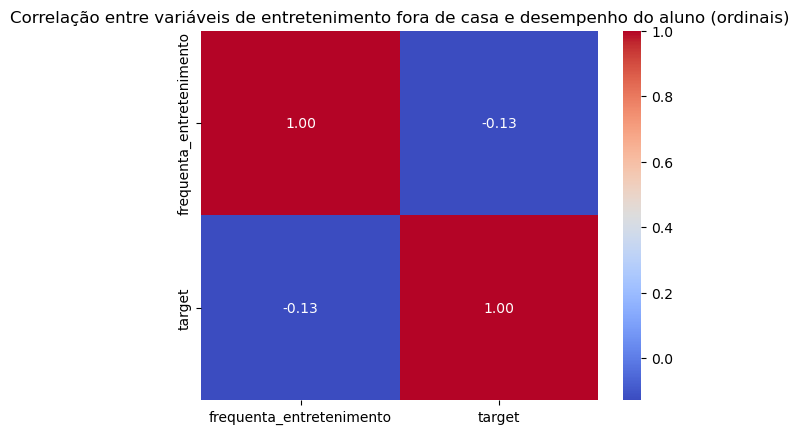

<Figure size 1000x1000 with 0 Axes>

In [14]:
# colunas 'frequenta_'

columns_oi = [col for col in df.columns if 'frequenta_' in col] + ['target']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de entretenimento fora de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

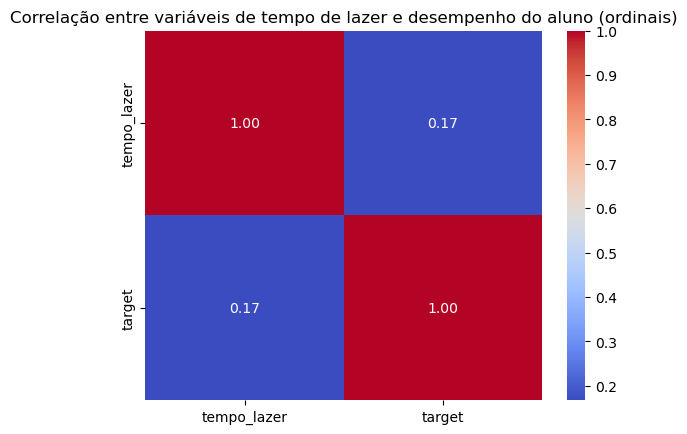

<Figure size 1000x1000 with 0 Axes>

In [16]:
columns_oi_lazer = [col for col in df.columns if 'tempo_' in col] + ['target']

corr = df[columns_oi_lazer].corr()
plt.title('Correlação entre variáveis de tempo de lazer e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

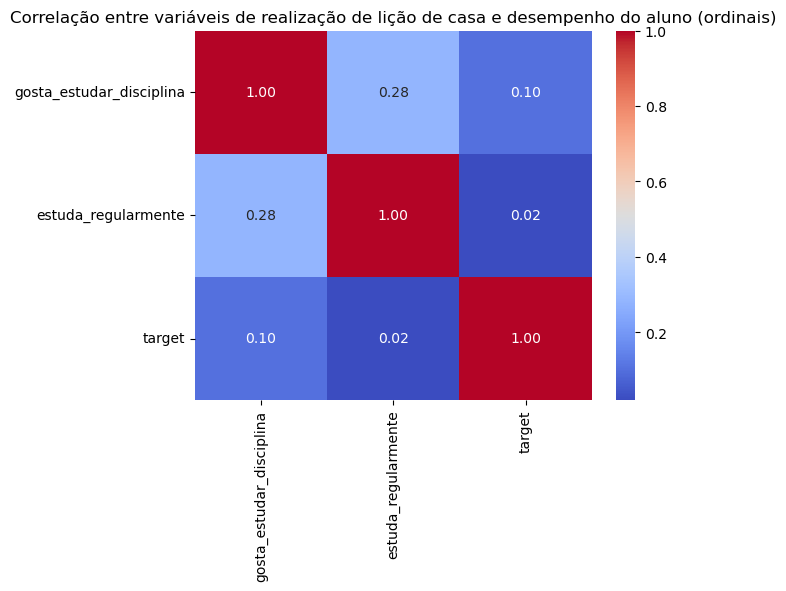

<Figure size 1000x1000 with 0 Axes>

In [18]:
columns_oi_licao = [col for col in df.columns if 'estuda' in col] + ['target']

corr = df[columns_oi_licao].corr()
plt.title('Correlação entre variáveis de realização de lição de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

Index(['idade', 'gosta_estudar_disciplina', 'turno', 'desempenho_aluno_cat',
       'leitura', 'estuda_regularmente', 'target'],
      dtype='object')


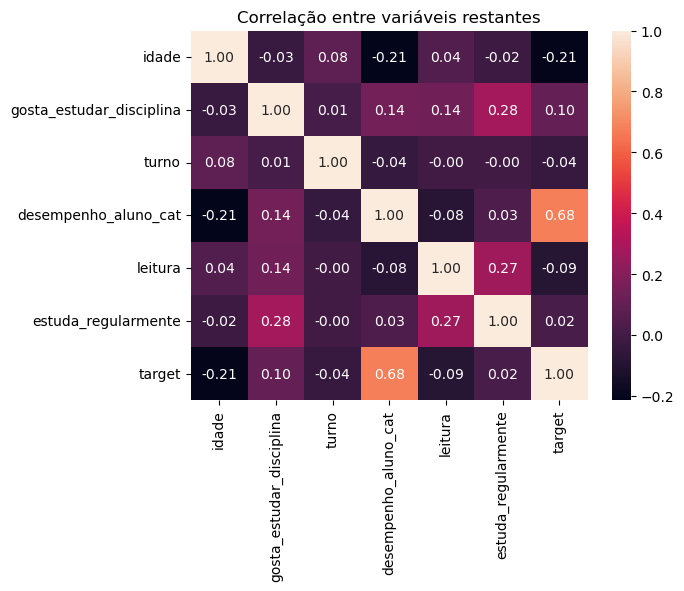

<Figure size 2000x2000 with 0 Axes>

In [21]:
# heatmap for columns relationship
exclude = ['ano', 'sigla_uf', 'escola_publica', 'id_aluno', 'situacao_censo',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento']

exclude += [col for col in df.columns if 'leitura_' in col]
exclude += [col for col in df.columns if 'responsaveis_' in col]
exclude += [col for col in df.columns if 'frequenta_' in col]
#exclude += ['rede', 'id_escola', 'turno']
exclude += ['serie', 'rede', 'id_escola']
exclude += [col for col in df.columns if 'tempo_' in col]
exclude += [col for col in df.columns if 'faz_licao_casa' in col]
exclude += [col for col in df.columns if 'correcao_licao_casa' in col]
exclude += [col for col in df.columns if 'utiliza_biblioteca_escola' in col]
exclude += [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col]
exclude += ['possui_computador']

print(df.drop(exclude, axis=1).columns)

corr = df.drop(exclude, axis=1).corr()
plt.title('Correlação entre variáveis restantes')
sns.heatmap(corr, annot=True, fmt=".2f")
plt.figure(figsize=(20, 20))
plt.show()